In [2]:
#hide
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

# Tutorial: Using datasets

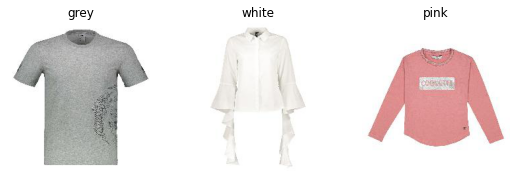

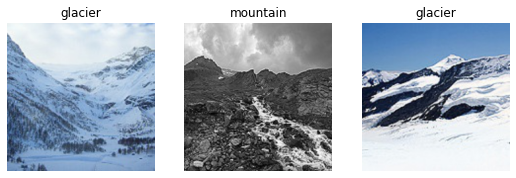

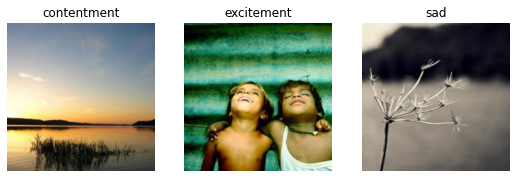

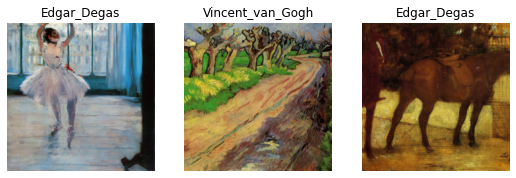

In [3]:
import os, glob
from rich import print
from image_folder_datasets.core import ImageFolderDataModule

data_dirs = sorted(list(glob.glob('Datasets/*')))
print(len(data_dirs))
for i, data_dir in enumerate(data_dirs):
    if os.path.isdir(os.path.join(data_dir, 'test')):
        os.rename(os.path.join(data_dir, 'test'), os.path.join(data_dir, 'val'))
    dm = ImageFolderDataModule(data_dir, 128, transform=None, num_workers=8)
    dm.setup()
    
    print(os.path.basename(data_dir))
    dm.dls.show_batch(max_n=3)
    if i == 3:
        break

In [32]:
from sklearn import svm
import numpy as np
import pytorch_lightning as pl
from image_folder_datasets.core import CNNModule
from torchvision import transforms as tfms
from einops.layers.torch import Rearrange
from sklearn.metrics import classification_report

transform = tfms.Compose([
    tfms.Grayscale(),
    tfms.Resize(128, interpolation=2),
    tfms.RandomCrop(112),
    tfms.ToTensor(),
    Rearrange('h w c -> (h w c)'), 
])

results = {}

data_dirs = sorted(list(glob.glob('Datasets/*')))

for i, data_dir in enumerate(data_dirs):
    
    dm = ImageFolderDataModule(data_dir, 256, transform, num_workers=8)
    dm.setup()
    
    x_train, y_train = zip(*[(np.asarray(x),y) for x, y in dm.trainset])
    x_val, y_val = zip(*[(np.asarray(x),y) for x, y in dm.valset])
    
    clf = svm.SVC()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_val)
    result = classification_report(y_val, y_pred, output_dict=True)
    
    dataset_name = os.path.basename(data_dir)
    results[dataset_name] = results
    print(dataset_name, results['accuracy'])
    
   

KeyError: 'accuracy'